📝 **Author:** Amirhossein Heydari - 📧 **Email:** amirhosseinheydari78@gmail.com - 📍 **Linktree:** [linktr.ee/mr_pylin](https://linktr.ee/mr_pylin)

---

# Dependencies

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn import datasets

# Linear Regression

<div style="display:flex; margin-top:50px;">
   <div style="width:20%; margin-right:auto; margin-left:auto;">
      <table style="margin:0 auto; width:80%; text-align:center">
         <caption style="font-weight:bold;">Dataset</caption>
         <thead>
            <tr>
               <th style="width:25%;"><span style="color:magenta;">#</span></th>
               <th style="width:25%;"><span style="color:#9090ff;">x<sub>1</sub></span></th>
               <th style="width:25%;"><span style="color:red;">y</span></th>
            </tr>
         </thead>
         <tbody>
            <tr><th>1</th><td>1</td><td>2</td></tr>
            <tr><th>2</th><td>2</td><td>4</td></tr>
            <tr><th>3</th><td>3</td><td>6</td></tr>
            <tr><th>4</th><td>4</td><td>8</td></tr>
            <tr><th>5</th><td>5</td><td>10</td></tr>
            <tr><th>6</th><td>6</td><td>12</td></tr>
            <tr><th>7</th><td>7</td><td>14</td></tr>
         </tbody>
      </table>
   </div>
   <div style="width:80%; padding:10px;">
      <figure style="text-align:center; margin:0;">
         <img src="../assets/images/original/perceptron/linear-regression.svg" alt="linear-regression.svg" style="max-width:80%; height:auto;">
         <figcaption style="font-size:smaller; text-align:center;">Linear Regression Model</figcaption>
      </figure>
   </div>
</div>

In [30]:
dataset = torch.tensor(
    [
        [1, 2],
        [2, 4],
        [3, 6],
        [4, 8],
        [5, 10],
        [6, 12],
        [7, 14]
    ]
)

In [31]:
trainset = dataset[:5]

x_train = trainset[:, 0].type(torch.float32)
y_train = trainset[:, 1].type(torch.float32)

# log
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: tensor([1., 2., 3., 4., 5.])
y_train: tensor([ 2.,  4.,  6.,  8., 10.])


In [32]:
testset = dataset[5:]

x_test = testset[:, 0].type(torch.float32)
y_test = testset[:, 1].type(torch.float32)

# log
print(f"x_test: {x_test}")
print(f"y_test: {y_test}")

x_test: tensor([6., 7.])
y_test: tensor([12., 14.])


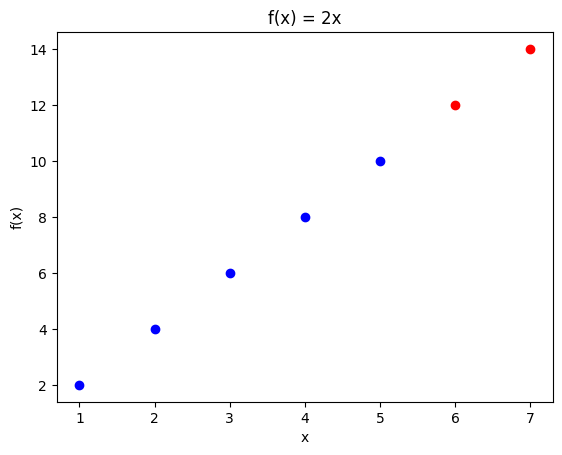

In [33]:
# plot
plt.scatter(trainset[:, 0], trainset[:, 1], c='blue')
plt.scatter(testset[:, 0], testset[:, 1], c='red')
plt.title("f(x) = 2x")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Implementation 1
<ul>
    <li style="font-family: consolas;">feed-forward &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: red">Manual</span></li>
    <li style="font-family: consolas;">compute gradient : <span style="color: red">Manual</span></li>
    <li style="font-family: consolas;">compute loss &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: red">Manual</span></li>
    <li style="font-family: consolas;">update weights &nbsp;&nbsp;: <span style="color: red">Manual</span></li>
    
</ul>

In [34]:
# initial weight
w = torch.tensor([0.0])

# feed-forward
def forward(x):
    return w * x

# MSE loss
def loss(y_pred, y_train):
    return ((y_pred - y_train) ** 2).mean()

# backward
def gradient(x, y_pred, y_train):
    # MSE   = 1/N * (w*x - y) ** 2
    # dl/dw = 1/N * 2x * (w*x - y)
    return (2 * x * (y_pred - y_train)).mean()

# hyper parameters
lr = 0.01
epoch = 20

for i in range(epoch):

    # forward
    y_pred = forward(x_train)

    # backward
    l = loss(y_pred, y_train)
    dw = gradient(x_train, y_pred, y_train)

    # update parameters
    w -= lr * dw

    # test
    y_pred = forward(x_test)

    # log
    print(f"epoch: {i:>2} -> loss={l:>9.5f} | w_old= {(w + lr * dw).item():.3f} | step= {(lr * dw).item():.5f} | w_new= {w.item():.3f} | y_test= {y_pred.round(decimals=4)}")

epoch:  0 -> loss= 44.00000 | w_old= 0.000 | step= -0.44000 | w_new= 0.440 | y_test= tensor([2.6400, 3.0800])
epoch:  1 -> loss= 26.76960 | w_old= 0.440 | step= -0.34320 | w_new= 0.783 | y_test= tensor([4.6992, 5.4824])
epoch:  2 -> loss= 16.28662 | w_old= 0.783 | step= -0.26770 | w_new= 1.051 | y_test= tensor([6.3054, 7.3563])
epoch:  3 -> loss=  9.90878 | w_old= 1.051 | step= -0.20880 | w_new= 1.260 | y_test= tensor([7.5582, 8.8179])
epoch:  4 -> loss=  6.02850 | w_old= 1.260 | step= -0.16287 | w_new= 1.423 | y_test= tensor([8.5354, 9.9580])
epoch:  5 -> loss=  3.66774 | w_old= 1.423 | step= -0.12704 | w_new= 1.550 | y_test= tensor([ 9.2976, 10.8472])
epoch:  6 -> loss=  2.23145 | w_old= 1.550 | step= -0.09909 | w_new= 1.649 | y_test= tensor([ 9.8921, 11.5408])
epoch:  7 -> loss=  1.35762 | w_old= 1.649 | step= -0.07729 | w_new= 1.726 | y_test= tensor([10.3559, 12.0818])
epoch:  8 -> loss=  0.82597 | w_old= 1.726 | step= -0.06029 | w_new= 1.786 | y_test= tensor([10.7176, 12.5038])
ep

## Implementation 2
<ul>
    <li style="font-family: consolas;">feed-forward &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: red">Manual</span></li>
    <li style="font-family: consolas;">compute gradient : <span style="color: cyan">PyTorch</span></li>
    <li style="font-family: consolas;">compute loss &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: red">Manual</span></li>
    <li style="font-family: consolas;">update weights &nbsp;&nbsp;: <span style="color: red">Manual</span></li>
</ul>

In [35]:
# initial weight
w = torch.tensor([0.0], requires_grad=True)

# feed-forward
def forward(x):
    return w * x

# MSE loss
def loss(y_pred, y_train):
    return ((y_pred - y_train) ** 2).mean()

# hyper parameters
lr = 0.01
epoch = 20

for i in range(epoch):

    # forward
    y_pred = forward(x_train)

    # backward
    l = loss(y_pred, y_train)
    l.backward()

    # update parameters
    with torch.no_grad():
        w -= lr * w.grad

    # test
    with torch.no_grad():
        y_pred = forward(x_test)

    # log
    print(f"epoch: {i:>2} -> loss={l:>9.5f} | w_old= {(w + lr * w.grad).item():.3f} | step= {(lr * w.grad).item():.5f} | w_new= {w.item():.3f} | y_test= {y_pred.round(decimals=4).detach()}")

    # remove previous gradients
    w.grad.zero_()

epoch:  0 -> loss= 44.00000 | w_old= 0.000 | step= -0.44000 | w_new= 0.440 | y_test= tensor([2.6400, 3.0800])
epoch:  1 -> loss= 26.76960 | w_old= 0.440 | step= -0.34320 | w_new= 0.783 | y_test= tensor([4.6992, 5.4824])
epoch:  2 -> loss= 16.28662 | w_old= 0.783 | step= -0.26770 | w_new= 1.051 | y_test= tensor([6.3054, 7.3563])
epoch:  3 -> loss=  9.90878 | w_old= 1.051 | step= -0.20880 | w_new= 1.260 | y_test= tensor([7.5582, 8.8179])
epoch:  4 -> loss=  6.02850 | w_old= 1.260 | step= -0.16287 | w_new= 1.423 | y_test= tensor([8.5354, 9.9580])
epoch:  5 -> loss=  3.66774 | w_old= 1.423 | step= -0.12704 | w_new= 1.550 | y_test= tensor([ 9.2976, 10.8472])
epoch:  6 -> loss=  2.23145 | w_old= 1.550 | step= -0.09909 | w_new= 1.649 | y_test= tensor([ 9.8921, 11.5408])
epoch:  7 -> loss=  1.35762 | w_old= 1.649 | step= -0.07729 | w_new= 1.726 | y_test= tensor([10.3559, 12.0818])
epoch:  8 -> loss=  0.82597 | w_old= 1.726 | step= -0.06029 | w_new= 1.786 | y_test= tensor([10.7176, 12.5038])
ep

## Implementation 3
<ul>
    <li style="font-family: consolas;">feed-forward &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: red">Manual</span></li>
    <li style="font-family: consolas;">compute gradient : <span style="color: cyan">PyTorch</span></li>
    <li style="font-family: consolas;">compute loss &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: cyan">PyTorch</span></li>
    <li style="font-family: consolas;">update weights &nbsp;&nbsp;: <span style="color: cyan">PyTorch</span></li>
</ul>

In [36]:
# initial weight
w = torch.tensor([0.0], requires_grad=True)

# feed-forward
def forward(x):
    return w * x

# hyper parameters
lr = 0.01
epoch = 20
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD([w], lr)

for i in range(epoch):

    # forward
    y_pred = forward(x_train)

    # backward
    l = criterion(y_pred, y_train)
    l.backward()

    # update parameters
    optimizer.step()

    # test
    with torch.no_grad():
        y_pred = forward(x_test)

    # log
    print(f"epoch: {i:>2} -> loss={l:>9.5f} | w_old= {(w + lr * w.grad).item():.3f} | step= {(lr * w.grad).item():.5f} | w_new= {w.item():.3f} | y_test= {y_pred.round(decimals=4).detach()}")

    # remove previous gradients
    optimizer.zero_grad()

epoch:  0 -> loss= 44.00000 | w_old= 0.000 | step= -0.44000 | w_new= 0.440 | y_test= tensor([2.6400, 3.0800])
epoch:  1 -> loss= 26.76960 | w_old= 0.440 | step= -0.34320 | w_new= 0.783 | y_test= tensor([4.6992, 5.4824])
epoch:  2 -> loss= 16.28662 | w_old= 0.783 | step= -0.26770 | w_new= 1.051 | y_test= tensor([6.3054, 7.3563])
epoch:  3 -> loss=  9.90878 | w_old= 1.051 | step= -0.20880 | w_new= 1.260 | y_test= tensor([7.5582, 8.8179])
epoch:  4 -> loss=  6.02850 | w_old= 1.260 | step= -0.16287 | w_new= 1.423 | y_test= tensor([8.5354, 9.9580])
epoch:  5 -> loss=  3.66774 | w_old= 1.423 | step= -0.12704 | w_new= 1.550 | y_test= tensor([ 9.2976, 10.8472])
epoch:  6 -> loss=  2.23145 | w_old= 1.550 | step= -0.09909 | w_new= 1.649 | y_test= tensor([ 9.8921, 11.5408])
epoch:  7 -> loss=  1.35762 | w_old= 1.649 | step= -0.07729 | w_new= 1.726 | y_test= tensor([10.3559, 12.0818])
epoch:  8 -> loss=  0.82597 | w_old= 1.726 | step= -0.06029 | w_new= 1.786 | y_test= tensor([10.7176, 12.5038])
ep

## Implementation 4
<ul>
    <li style="font-family: consolas;">feed-forward &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: cyan">PyTorch</span></li>
    <li style="font-family: consolas;">compute gradient : <span style="color: cyan">PyTorch</span></li>
    <li style="font-family: consolas;">compute loss &nbsp;&nbsp;&nbsp;&nbsp;: <span style="color: cyan">PyTorch</span></li>
    <li style="font-family: consolas;">update weights &nbsp;&nbsp;: <span style="color: cyan">PyTorch</span></li>
</ul>

In [37]:
# reshape dataset [row: num of samples - column: num of features]
x_train, x_test, y_train, y_test = map(lambda x: x.reshape(-1, 1), [x_train, x_test, y_train, y_test])

# linear regression model
model = torch.nn.Linear(in_features=1, out_features=1, bias=False)

# initial weight [educational purpose]
with torch.no_grad():
    model.weight.fill_(0.0)

# hyper parameters
lr = 0.01
epoch = 20
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr)

for i in range(epoch):

    # forward
    y_pred = model(x_train)

    # backward
    l = criterion(y_pred, y_train)
    l.backward()

    # update parameters
    optimizer.step()

    # test
    with torch.no_grad():
        y_pred = forward(x_test)

    # log
    print(f"epoch: {i:>2} -> loss={l:>9.5f} | w_old= {(model.weight + lr * model.weight.grad).item():.3f} | step= {(lr * model.weight.grad).item():.5f} | w_new= {model.weight.item():.3f} | y_test= {y_pred.squeeze().round(decimals=4).detach()}")

    # remove previous gradients
    optimizer.zero_grad()

epoch:  0 -> loss= 44.00000 | w_old= 0.000 | step= -0.44000 | w_new= 0.440 | y_test= tensor([11.9166, 13.9027])
epoch:  1 -> loss= 26.76960 | w_old= 0.440 | step= -0.34320 | w_new= 0.783 | y_test= tensor([11.9166, 13.9027])
epoch:  2 -> loss= 16.28662 | w_old= 0.783 | step= -0.26770 | w_new= 1.051 | y_test= tensor([11.9166, 13.9027])
epoch:  3 -> loss=  9.90878 | w_old= 1.051 | step= -0.20880 | w_new= 1.260 | y_test= tensor([11.9166, 13.9027])
epoch:  4 -> loss=  6.02850 | w_old= 1.260 | step= -0.16287 | w_new= 1.423 | y_test= tensor([11.9166, 13.9027])
epoch:  5 -> loss=  3.66774 | w_old= 1.423 | step= -0.12704 | w_new= 1.550 | y_test= tensor([11.9166, 13.9027])
epoch:  6 -> loss=  2.23145 | w_old= 1.550 | step= -0.09909 | w_new= 1.649 | y_test= tensor([11.9166, 13.9027])
epoch:  7 -> loss=  1.35762 | w_old= 1.649 | step= -0.07729 | w_new= 1.726 | y_test= tensor([11.9166, 13.9027])
epoch:  8 -> loss=  0.82597 | w_old= 1.726 | step= -0.06029 | w_new= 1.786 | y_test= tensor([11.9166, 13

## Example: All In One

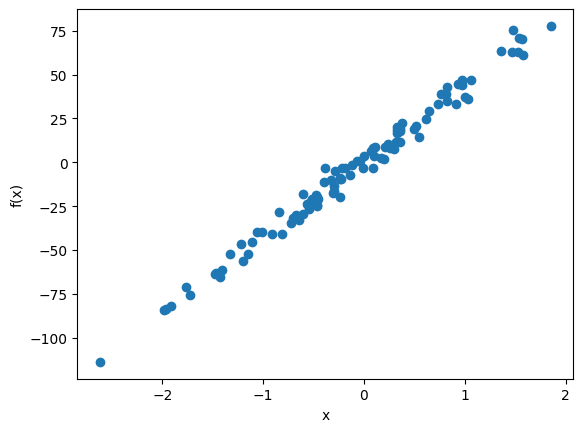

In [38]:
# generate artificial data
n_samples, n_features = [100, 1]

x, y = datasets.make_regression(n_samples, n_features, noise=5, random_state=42)

# convert numpy.ndarray to torch.Tensor
x_train = torch.from_numpy(x.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32)).view(-1, 1)

# plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [39]:
# linear regression model
model = torch.nn.Linear(n_features, 1)

model

Linear(in_features=1, out_features=1, bias=True)

In [40]:
# plot stuff
W = torch.linspace(-100, 100, 500)
L = torch.zeros(size=(500, ))

for i, val in enumerate(W):
    with torch.no_grad():
        model.weight.fill_(val)
        L[i] = loss(model(x_train), y_train)

state = []

In [41]:
# initial weight [educational purpose]
with torch.no_grad():
    model.weight.fill_(-25)

# hyper parameters
epoch = 21
lr = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss = torch.nn.MSELoss()

# training loop
model.train()
for i in range(epoch):

    # forward
    y_pred = model(x_train)

    # backward
    l = loss(y_pred, y_train)
    l.backward()

    # save new y_pred every 5 epochs [plot stuff]
    if i % 5 == 0:
        state.append([i, model.weight.item(), l.item(), y_pred.detach().numpy()])

    # update parameters
    optimizer.step()
    optimizer.zero_grad()

    # log
    print(f"epoch: {i:>2} -> loss: {l.item():>10.5f}")

epoch:  0 -> loss: 3837.08105
epoch:  1 -> loss: 3226.42969
epoch:  2 -> loss: 2714.98193
epoch:  3 -> loss: 2286.33838
epoch:  4 -> loss: 1926.86182
epoch:  5 -> loss: 1625.20471
epoch:  6 -> loss: 1371.91345
epoch:  7 -> loss: 1159.11060
epoch:  8 -> loss:  980.22351
epoch:  9 -> loss:  829.76514
epoch: 10 -> loss:  703.15198
epoch: 11 -> loss:  596.55115
epoch: 12 -> loss:  506.75641
epoch: 13 -> loss:  431.08316
epoch: 14 -> loss:  367.28232
epoch: 15 -> loss:  313.46820
epoch: 16 -> loss:  268.05914
epoch: 17 -> loss:  229.72745
epoch: 18 -> loss:  197.35793
epoch: 19 -> loss:  170.01349
epoch: 20 -> loss:  146.90619


In [ ]:
# plot
rows = epoch // 5 + 1
fig, axs = plt.subplots(nrows=rows, ncols=2, figsize=(10, 20), layout='compressed')

for row in range(rows):
    axs[row, 0].plot(x_train, y_train, 'ro')
    axs[row, 0].plot(x_train, state[row][3], 'b')
    axs[row, 0].set(title=f"epoch: {state[row][0]}", xlabel="x", ylabel="f(x)")
    axs[row, 1].plot(state[row][1], state[row][2], 'ro')
    axs[row, 1].plot(W, L, 'b')
    axs[row, 1].set(title="loss function", xlabel="w", ylabel="L(w)")

plt.show()